<a href="https://colab.research.google.com/github/Namesakenberg/Hyperparameter-Hangout/blob/main/log_transformation_on_titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df=pd.read_csv('/content/titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# objective is to get a normal distribution curve in probability density function for the below given  columns
1) Age

2) Fare

3) Survived

In [4]:
df=df[['Survived','Age','Fare']]

In [5]:
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [6]:
# the Age column has null values

In [7]:
df['Age'].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [8]:
# the mean and the median values are almost similar in this case , hence substitutue it with the mean

In [9]:
df.fillna(df['Age'].mean(),inplace=True)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

# age and the fare on the X axis
# Survived column on the y axis

In [12]:
X_train ,X_test , y_train ,y_test =train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
X_train.head()

,Age,Fare
331,45.5,28.5000
733,23.0,13.0000
382,32.0,7.9250
704,26.0,7.8542
813,6.0,31.2750


Identifying whether the Age and the fare columns have the normal distribution curve

Text(0.5, 1.0, 'probability density function')

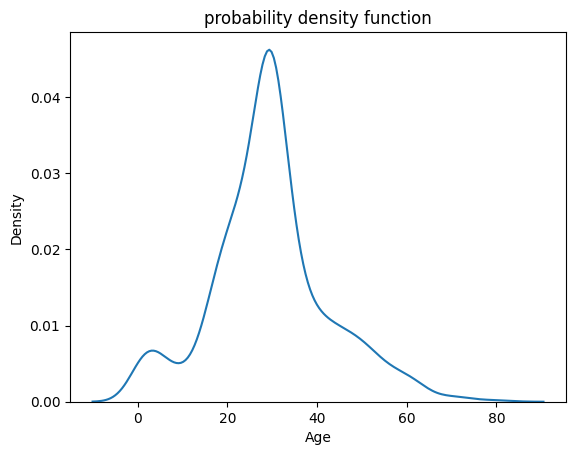

In [14]:
# get the probability density curve for the Age column
pdf= sns.kdeplot(X_train['Age'])
pdf.set_title('probability density function')

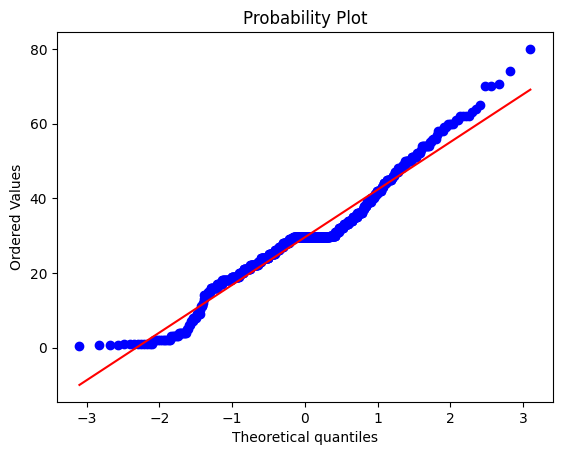

In [15]:
# QQ plot
qq_plot=stats.probplot(X_train['Age'],dist="norm",plot=plt)


## the distribution has a pattern of normal distribution but is not exactly normal distribution

In [16]:
# do the same for the fare column

Text(0.5, 1.0, 'pdf of fare')

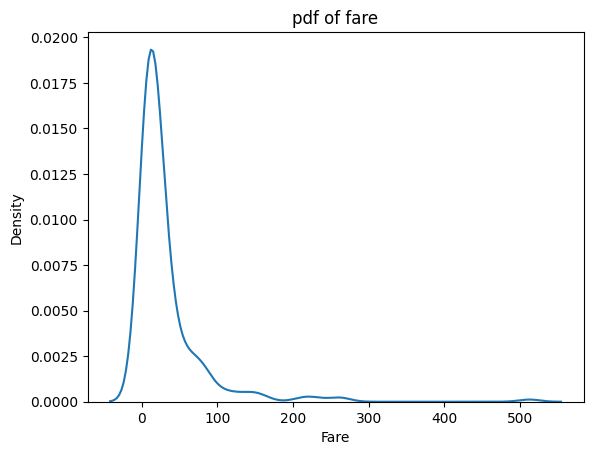

In [17]:
pdf_fare=sns.kdeplot(X_train['Fare'])
pdf_fare.set_title('pdf of fare')

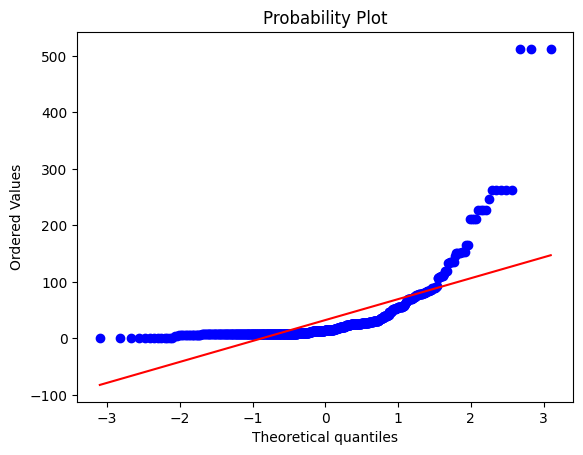

In [18]:
# QQ plot of the fare
QQ_plot_fare = stats.probplot(X_train['Fare'],dist="norm",plot=plt)

## the plot of the Fare is not even closer to the normal distribution also it is skewed to the right side

In [19]:
# since the data is skewed to the right we can use the log transform to make it similar to normal

In [20]:
# also we implement lofgistic regression and decision tree to the the data before and after the transformation is done to compare and check the results

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("the accuracy of the logistic regression model before the transformation is  : ",accuracy_score(y_test,y_pred))

the accuracy of the logistic regression model before the transformation is  :  0.6480446927374302


In [23]:
from sklearn.tree import DecisionTreeClassifier
clf_2 = DecisionTreeClassifier()
clf_2.fit(X_train,y_train)
y_pred2=clf_2.predict(X_test)
print("the accuracy of the decision tree model before the transformation is  : ",accuracy_score(y_test,y_pred2))

the accuracy of the decision tree model before the transformation is  :  0.6703910614525139


In [24]:
# now applaying the log transformer on the data
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(func=np.log1p)
#  log1p adds one to every value of the data column and then calculates the log of it. 1 is added because , if there is any value equal to 0 in the data , then its log would be undefined as log0=undefined

In [25]:
# apply the transformations to X train transform and X test transform
X_trained_Transform = log_transformer.fit_transform(X_train)
X_test_Transform = log_transformer.fit_transform(X_test)

In [30]:
clf = LogisticRegression()
clf.fit(X_trained_Transform , y_train)
y_pred = clf.predict(X_test_Transform)
print("the accuracy of the logistic regression after the transformation is  : ",accuracy_score(y_test ,y_pred))

the accuracy of the logistic regression after the transformation is  :  0.6815642458100558


In [29]:
clf_2 = DecisionTreeClassifier()
clf_2.fit(X_trained_Transform,y_train)
y_pred2=clf.predict(X_test_Transform)
print("the accuracy of the decision tree model after the transformation is  : ",accuracy_score(y_test ,y_pred))

the accuracy of the decision tree model after the transformation is  :  0.6815642458100558


## after the transformation there is no change in the accuracy of decision tree model . This is because some models just do not care about the distribution of the data.

## But there was as improvement in the logistic regression model

In [33]:
# rechecking whether the accuracy really increses or not using the crossvalidation
from sklearn.model_selection import cross_val_score
X_transformed = log_transformer.fit_transform(X)
clf = LogisticRegression()
clf_2= DecisionTreeClassifier()
print("Logistic regression : ",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("Decision Tree : ",np.mean(cross_val_score(clf_2,X_transformed,y,scoring='accuracy',cv=10)))

# in the cross validation score we do the train test split 10 times and get the accuracy and find its mean ,
# as multiple readings give a reliable answer

Logistic regression :  0.678027465667915
Decision Tree :  0.6644694132334583


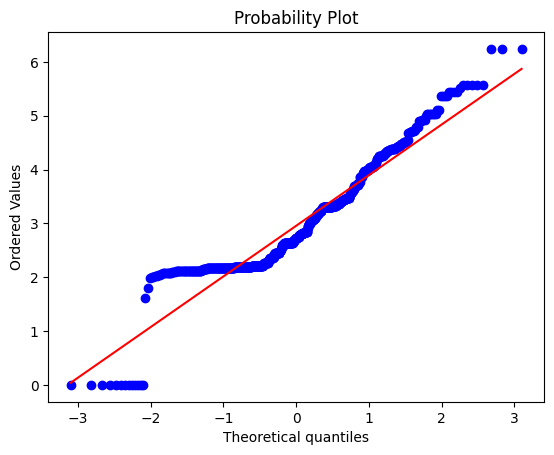

In [36]:
QQ_plot_fare_after_transformation = stats.probplot(X_trained_Transform['Fare'],dist="norm",plot=plt)

In [ ]:
# from the new QQ plot we can see that after transformation the plot imporved

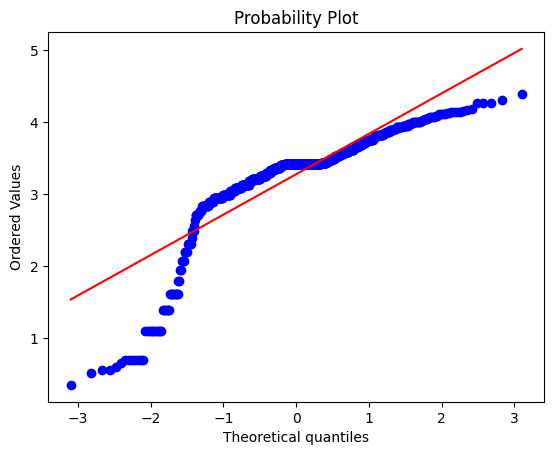

In [38]:
QQ_plot_fare_after_transformation_logReg = stats.probplot(X_trained_Transform['Age'],dist="norm",plot=plt)

 the above QQ plot is for the age after log transformation , the curve is worse than before , hence it was not a good idea to use the log transformation to the Age data , as it was not right skewed